In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
data_pixel = {
    60: {'x_px': [178, 490, 800, 1112, 1425, 1737], 'y_px': 413},
    120: {'x_px': [102, 294, 483, 674, 864, 1054, 1244, 1436, 1625, 1809], 'y_px': 548},
    180: {'x_px': [348, 485, 620, 756, 892, 1028, 1164, 1300, 1436, 1573], 'y_px': 608},
    240: {'x_px': [478, 585, 692, 800, 907, 1014, 1121, 1230, 1337, 1443], 'y_px': 640},
    300: {'x_px': [561, 652, 740, 828, 917, 1005, 1094, 1181, 1271, 1354], 'y_px': 661},
    360: {'x_px': [627, 700, 775, 850, 924, 998, 1070, 1147, 1221, 1289], 'y_px': 678},
    420: {'x_px': [674, 734, 798, 866, 930, 993, 1056, 1122, 1187, 1246], 'y_px': 688},
    480: {'x_px': [698, 756, 814, 874, 932, 990, 1048, 1107, 1164, 1228], 'y_px': 695},
    540: {'x_px': [726, 774, 827, 883, 936, 987, 1039, 1092, 1148, 1201], 'y_px': 702},
}

In [3]:
xr_values = {
    60: 143, 120: 88, 180: 65, 240: 50, 300: 41, 360: 35, 420: 29, 480: 27, 540: 25
}

In [4]:
def calculate_dx_table(data_pixel, xr_values):
    dx_table = {}
    for t, data in data_pixel.items():
        x_px = data['x_px']
        x_r = xr_values[t]
        dx_values = []
        for k in range(1, len(x_px)):
            dx = (2.5 / x_r) * (x_px[k] - x_px[k - 1])
            dx_values.append(round(dx, 4))
        dx_table[t] = dx_values
    return dx_table

In [5]:
dx_table = calculate_dx_table(data_pixel, xr_values)

dx_df = pd.DataFrame.from_dict(dx_table, orient='index').transpose()
dx_df.columns = [f't = {t}' for t in dx_table.keys()]
dx_df

,t = 60,t = 120,t = 180,t = 240,t = 300,t = 360,t = 420,t = 480,t = 540
0,5.4545,5.4545,5.2692,5.35,5.5488,5.2143,5.1724,5.3704,4.8
1,5.4196,5.3693,5.1923,5.35,5.3659,5.3571,5.5172,5.3704,5.3
2,5.4545,5.4261,5.2308,5.40,5.3659,5.3571,5.8621,5.5556,5.6
3,5.4720,5.3977,5.2308,5.35,5.4268,5.2857,5.5172,5.3704,5.3
4,5.4545,5.3977,5.2308,5.35,5.3659,5.2857,5.4310,5.3704,5.1
5,NaN,5.3977,5.2308,5.35,5.4268,5.1429,5.4310,5.3704,5.2
6,NaN,5.4545,5.2308,5.45,5.3049,5.5000,5.6897,5.4630,5.3
7,NaN,5.3693,5.2308,5.35,5.4878,5.2857,5.6034,5.2778,5.6
8,NaN,5.2273,5.2692,5.30,5.0610,4.8571,5.0862,5.9259,5.3


In [6]:
y_values_table = {60: 5, 120: 10, 180: 15, 240: 20, 300: 25, 360: 30, 420: 35, 480: 40, 540: 45}

In [7]:
def calculate_xt_from_dx(dx_values, y_value):
    xt_values = [0]
    
    mid_dx = dx_values[len(dx_values) // 2] / 2
    xt_values = [-mid_dx, mid_dx]
    
    for dx in reversed(dx_values[:len(dx_values) // 2]):
        xt_values.insert(0, xt_values[0] - dx)
    
    for dx in dx_values[len(dx_values) // 2 + 1:]:
        xt_values.append(xt_values[-1] + dx)
    
    return [(round(x, 5), y_value) for x in xt_values]

In [8]:
xt_coordinates_table = {t: calculate_xt_from_dx(dx_values, y_value)
                        for t, (dx_values, y_value) in zip(dx_table.keys(), zip(dx_table.values(), y_values_table.values()))}
xt_coordinates_table[60] = [None, None] + xt_coordinates_table[60] + [None, None]

xt_coordinates_df = pd.DataFrame.from_dict(xt_coordinates_table, orient='index')
xt_coordinates_df

,0,1,2,3,4,5,6,7,8,9
60,None,None,"(-13.60135, 5)","(-8.14685, 5)","(-2.72725, 5)","(2.72725, 5)","(8.19925, 5)","(13.65375, 5)",None,None
120,"(-24.34645, 10)","(-18.89195, 10)","(-13.52265, 10)","(-8.09655, 10)","(-2.69885, 10)","(2.69885, 10)","(8.09655, 10)","(13.55105, 10)","(18.92035, 10)","(24.14765, 10)"
180,"(-23.5385, 15)","(-18.2693, 15)","(-13.077, 15)","(-7.8462, 15)","(-2.6154, 15)","(2.6154, 15)","(7.8462, 15)","(13.077, 15)","(18.3078, 15)","(23.577, 15)"
240,"(-24.125, 20)","(-18.775, 20)","(-13.425, 20)","(-8.025, 20)","(-2.675, 20)","(2.675, 20)","(8.025, 20)","(13.475, 20)","(18.825, 20)","(24.125, 20)"
300,"(-24.39035, 25)","(-18.84155, 25)","(-13.47565, 25)","(-8.10975, 25)","(-2.68295, 25)","(2.68295, 25)","(8.10975, 25)","(13.41465, 25)","(18.90245, 25)","(23.96345, 25)"
360,"(-23.85705, 30)","(-18.64275, 30)","(-13.28565, 30)","(-7.92855, 30)","(-2.64285, 30)","(2.64285, 30)","(7.78575, 30)","(13.28575, 30)","(18.57145, 30)","(23.42855, 30)"
420,"(-24.7844, 35)","(-19.612, 35)","(-14.0948, 35)","(-8.2327, 35)","(-2.7155, 35)","(2.7155, 35)","(8.1465, 35)","(13.8362, 35)","(19.4396, 35)","(24.5258, 35)"
480,"(-24.352, 40)","(-18.9816, 40)","(-13.6112, 40)","(-8.0556, 40)","(-2.6852, 40)","(2.6852, 40)","(8.0556, 40)","(13.5186, 40)","(18.7964, 40)","(24.7223, 40)"
540,"(-23.55, 45)","(-18.75, 45)","(-13.45, 45)","(-7.85, 45)","(-2.55, 45)","(2.55, 45)","(7.75, 45)","(13.05, 45)","(18.65, 45)","(23.95, 45)"


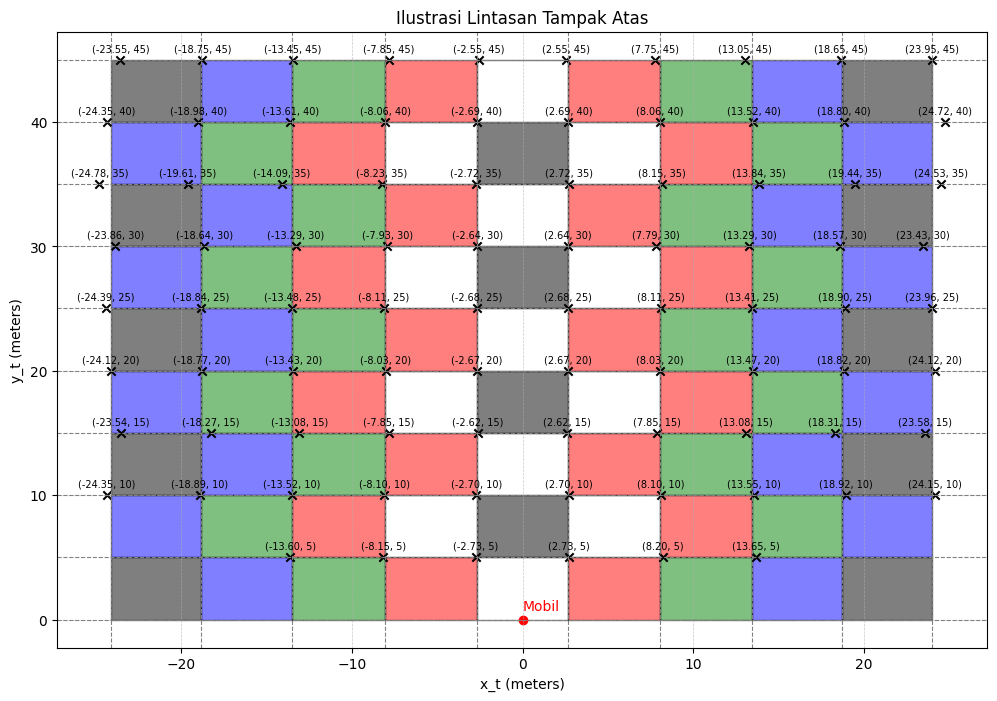

In [9]:
x_values_grid = [-24.117968750000003, -18.84551875, -13.504811111111112, -8.032355555555556, 
                 -2.665888888888889, 2.665888888888889, 8.0731, 13.457466666666667, 
                 18.72521875, 23.964112500000002]

xt_points = {
    60: [None, None, (-13.60135, 5), (-8.14685, 5), (-2.72725, 5), (2.72725, 5), (8.19925, 5), (13.65375, 5), None, None],
    120: [(-24.34645, 10), (-18.89195, 10), (-13.52265, 10), (-8.09655, 10), (-2.69885, 10), (2.69885, 10), (8.09655, 10), (13.55105, 10), (18.92035, 10), (24.14765, 10)],
    180: [(-23.5385, 15), (-18.2693, 15), (-13.077, 15), (-7.8462, 15), (-2.6154, 15), (2.6154, 15), (7.8462, 15), (13.077, 15), (18.3078, 15), (23.577, 15)],
    240: [(-24.125, 20), (-18.775, 20), (-13.425, 20), (-8.025, 20), (-2.675, 20), (2.675, 20), (8.025, 20), (13.475, 20), (18.825, 20), (24.125, 20)],
    300: [(-24.39035, 25), (-18.84155, 25), (-13.47565, 25), (-8.10975, 25), (-2.68295, 25), (2.68295, 25), (8.10975, 25), (13.41465, 25), (18.90245, 25), (23.96345, 25)],
    360: [(-23.85705, 30), (-18.64275, 30), (-13.28565, 30), (-7.92855, 30), (-2.64285, 30), (2.64285, 30), (7.78575, 30), (13.28575, 30), (18.57145, 30), (23.42855, 30)],
    420: [(-24.7844, 35), (-19.612, 35), (-14.0948, 35), (-8.2327, 35), (-2.7155, 35), (2.7155, 35), (8.1465, 35), (13.8362, 35), (19.4396, 35), (24.5258, 35)],
    480: [(-24.352, 40), (-18.9816, 40), (-13.6112, 40), (-8.0556, 40), (-2.6852, 40), (2.6852, 40), (8.0556, 40), (13.5186, 40), (18.7964, 40), (24.7223, 40)],
    540: [(-23.55, 45), (-18.75, 45), (-13.45, 45), (-7.85, 45), (-2.55, 45), (2.55, 45), (7.75, 45), (13.05, 45), (18.65, 45), (23.95, 45)]
}

color_patterns_updated = [
    ['black', 'blue'],
    ['blue', 'green'],
    ['green', 'red'],
    ['red', 'white'],
    ['white', 'black'],
    ['red', 'white'],
    ['green', 'red'],
    ['blue', 'green'],
    ['black', 'blue']
]
y_values = [5, 10, 15, 20, 25, 30, 35, 40, 45]
y_values_updated = [0] + y_values

plt.figure(figsize=(12, 8))

for x in x_values_grid:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.8)

for y in y_values_updated:
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.8)

for i in range(len(x_values_grid) - 1):
    for j in range(len(y_values_updated) - 1):
        x_rect = [x_values_grid[i], x_values_grid[i + 1], x_values_grid[i + 1], x_values_grid[i]]
        y_rect = [y_values_updated[j], y_values_updated[j], y_values_updated[j + 1], y_values_updated[j + 1]]
        color = color_patterns_updated[i % len(color_patterns_updated)][j % 2]
        plt.fill(x_rect, y_rect, color=color, edgecolor='black', alpha=0.5)

for t, points in xt_points.items():
    for point in points:
        if point is not None:
            plt.scatter(point[0], point[1], color='black', marker='x')
            plt.text(point[0], point[1] + 0.5, f"({point[0]:.2f}, {point[1]})", fontsize=7, ha='center', va='bottom')

plt.scatter(0, 0, color='red', label="Mobil")
plt.text(0, 0.5, "Mobil", color='red', fontsize=10, ha='left', va='bottom')

# Label the plot
plt.title("Ilustrasi Lintasan Tampak Atas")
plt.xlabel("x_t (meters)")
plt.ylabel("y_t (meters)")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()